# Regression Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
org_data = pd.read_csv('possum.csv')
org_data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [4]:
org_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
# checking for NaN vlaue
org_data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [6]:
# filling the NAN vlaue in age and footlength with mean
org_data['age'].fillna(org_data['age'].mean(),inplace=True)
org_data['footlgth'].fillna(org_data['footlgth'].mean(),inplace=True)

In [7]:
org_data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
org_data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
org_data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.890617,3.573349,3.113426,4.310549,1.959518,4.373917,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [12]:
# applying label encoding in pop and sex field
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data = org_data
data['Pop'] = en.fit_transform(org_data['Pop'])
data['sex'] = en.fit_transform(org_data['sex'])

In [13]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [14]:
data = data.drop(['case'],axis=1)

# Visualising the data

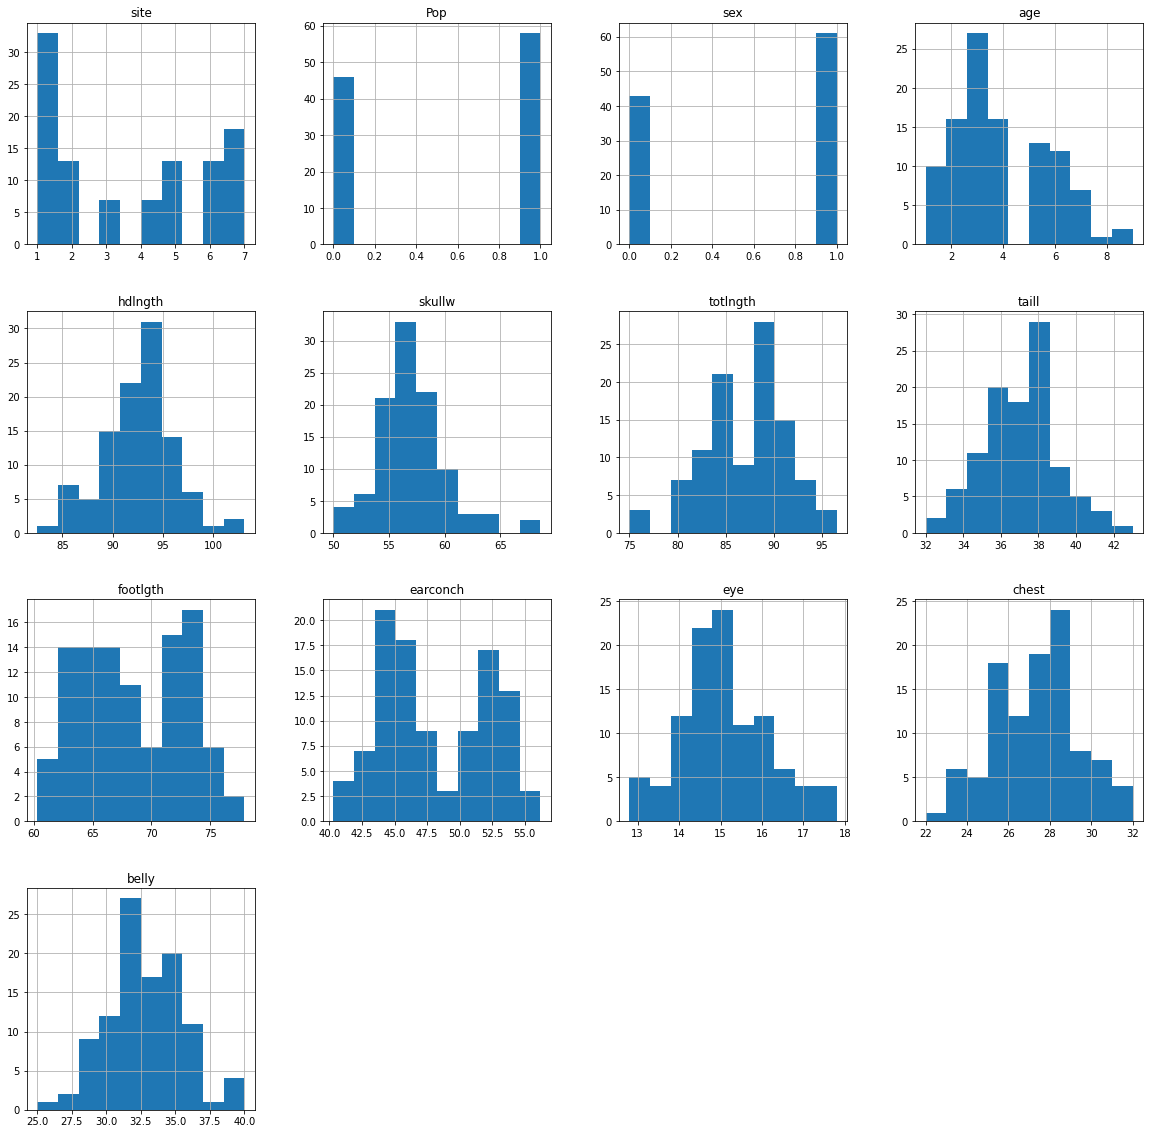

In [15]:
# histogram of data
data.hist(figsize=(20,20));

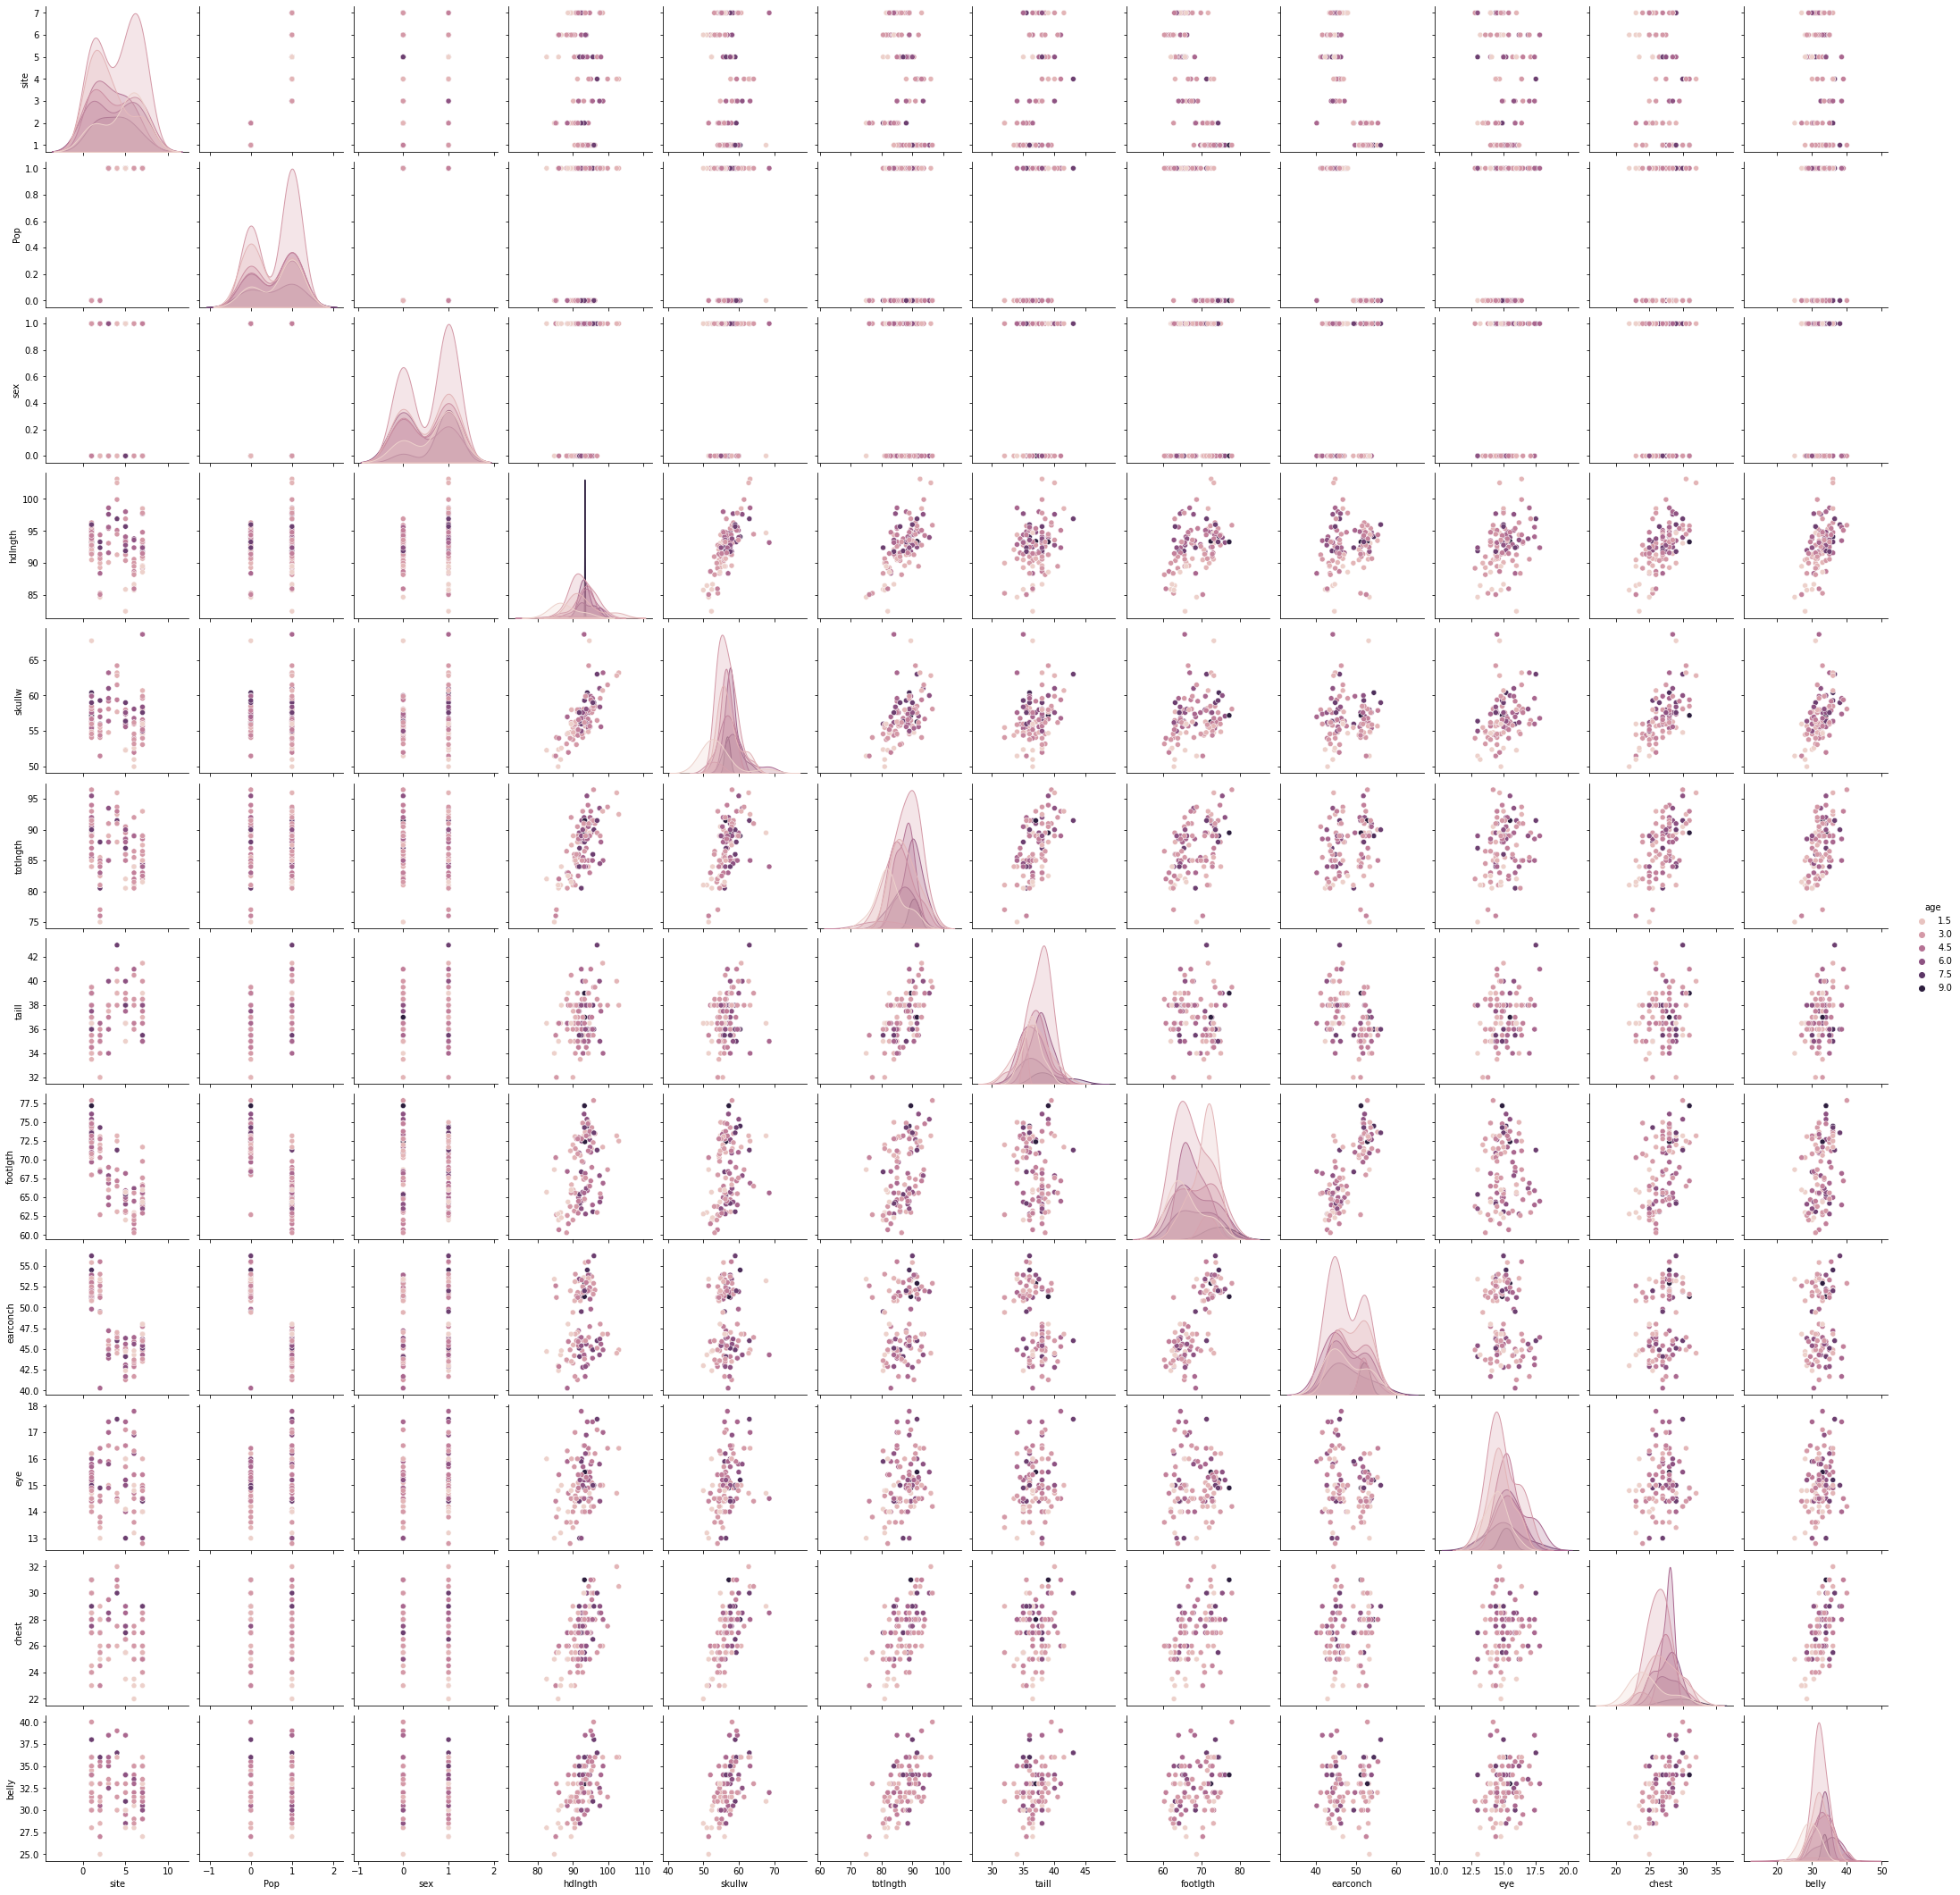

In [16]:
import seaborn as sns
sns.pairplot(data,hue='age')

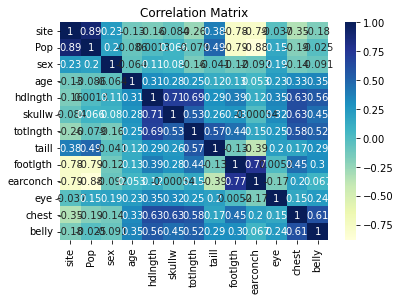

In [17]:
# Correlation Matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu");
plt.title("Correlation Matrix");
plt.show()

In [ ]:
# Finding IQR

In [20]:
# taking all numerical values
ndata = data.select_dtypes(include = np.number)
ndata.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [23]:
# getting range
ndata.max() - ndata.min()

site         6.0
Pop          1.0
sex          1.0
age          8.0
hdlngth     20.6
skullw      18.6
totlngth    21.5
taill       11.0
footlgth    17.6
earconch    15.9
eye          5.0
chest       10.0
belly       15.0
dtype: float64

In [24]:
# first Quartile
Q1 = ndata.quantile(0.25)
Q1

site         1.000
Pop          0.000
sex          0.000
age          2.750
hdlngth     90.675
skullw      54.975
totlngth    84.000
taill       35.875
footlgth    64.650
earconch    44.800
eye         14.400
chest       25.500
belly       31.000
Name: 0.25, dtype: float64

In [26]:
# second Quartile
Q2 = ndata.quantile(0.50)
Q2

site         3.00
Pop          1.00
sex          1.00
age          3.00
hdlngth     92.80
skullw      56.35
totlngth    88.00
taill       37.00
footlgth    68.10
earconch    46.80
eye         14.90
chest       27.00
belly       32.50
Name: 0.5, dtype: float64

In [27]:
# third Quartile
Q3 = ndata.quantile(0.75)
Q3

site         6.000
Pop          1.000
sex          1.000
age          5.000
hdlngth     94.725
skullw      58.100
totlngth    90.000
taill       38.000
footlgth    72.500
earconch    52.000
eye         15.725
chest       28.000
belly       34.125
Name: 0.75, dtype: float64

In [28]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

site        5.000
Pop         1.000
sex         1.000
age         2.250
hdlngth     4.050
skullw      3.125
totlngth    6.000
taill       2.125
footlgth    7.850
earconch    7.200
eye         1.325
chest       2.500
belly       3.125
dtype: float64

Text(0, 0.5, 'Total Length')

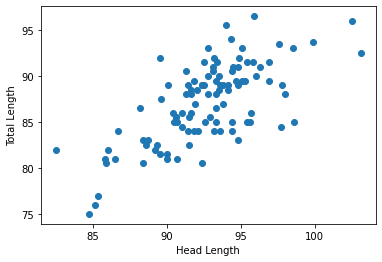

In [29]:
#total length vs head length
plt.scatter(data['hdlngth'], data['totlngth'])
plt.xlabel('Head Length')
plt.ylabel('Total Length')

In [30]:
ndata.shape

(104, 13)

In [33]:
# removing outliers
final_data = ndata[~((ndata < (Q1 - 1.5 * IQR)) |(ndata > (Q3 + 1.5 * IQR))).any(axis=1)]
final_data.shape

(86, 13)

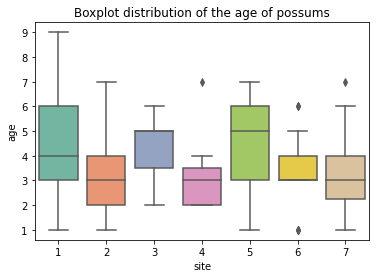

In [18]:
sns.boxplot(x="site", y="age", data= org_data ,palette="Set2"); 
plt.title("Boxplot distribution of the age of possums");

# Applying Regression Machine Learning model on final_data

In [114]:
# site and pop are correlated features
X = final_data.drop(['age','site'], axis=1)
y = final_data['age']

In [115]:
X

,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,1,1,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,1,0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,1,1,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [116]:
y

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, Length: 86, dtype: float64

In [117]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [120]:
model1 = LinearRegression()

In [121]:
model1.fit(X_train,y_train)

LinearRegression()

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# precting on training
pred = model1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,pred)))
r2 = r2_score(y_train, pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predicting on test
pred2 = model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred2)))
r2 = r2_score(y_test, pred2)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.4060188186167555
R2 score is 0.3038862019363009


The model performance for testing set
--------------------------------------
RMSE is 1.6146367288496148
R2 score is 0.10520680907557223


In [123]:
model2 = SVR(kernel='poly')

In [124]:
model2.fit(X_train,y_train)

SVR(kernel='poly')

In [125]:
# precting on training
pred3 = model2.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,pred3)))
r2 = r2_score(y_train, pred3)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predicting on test
pred4 = model2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred4)))
r2 = r2_score(y_test, pred4)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.0626175203622845
R2 score is 0.602394924309529


The model performance for testing set
--------------------------------------
RMSE is 1.497695921502216
R2 score is 0.23012483501680447
